# Projet - Python for Data Science  
Romane THOIREY / Bixente Grandjean
# The movie dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

Nous allons utiliser le dataset : [The movies dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset). Il regroupe plus de  26 millions de notes de 270 000 utilisateurs pour 45 000 films.  
Nous allons étudier plusieurs cas et analyser les résultats.

Dans un premier temps, nous allons charger dans le notebook les fichiers .csv puis nous allons nettoyer les fichiers pour ne garde que ce qui nous intéresse.

## Analyse  

Nous avons décider d'étudier : 
* Les genres
* Les acteurs
* Les mots clés
* Les films par année et par pays

In [2]:
def load_movies_metadata(file_path):
    df = pd.read_csv(file_path, dtype='unicode')
    # covert each item of release_date to datetime.date type entity
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: x.date())
    # all json columns`
    json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
    for column in json_columns:
        # use ast because json data has single quotes in the csv, which is invalid for a json object; it should be " normally
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return df

In [3]:
movies = load_movies_metadata(r"the-movies-dataset/movies_metadata.csv")

## Genre

Nous avons analyser les genres sous plusieurs formes (le plus rentable, le plus populaire).

In [4]:
genre_revenue = {}

for i in range(movies.shape[0]):
    for genre in movies['genres'][i]:
        if 'name' in genre and movies.iloc[i]['revenue'] is not np.nan:
            a = genre['name']
            b = int(movies.iloc[i]['revenue'])/1000000
            if a in genre_revenue:
                genre_revenue[a]['total_revenue'] += b 
            else:
                genre_revenue[a] = {}
                genre_revenue[a]['genre'] = a
                genre_revenue[a]['total_revenue'] = b

most_profitable_genre = pd.DataFrame(None,None,columns=['genre','revenue'])

for k,v in genre_revenue.items():
    most_profitable_genre =  most_profitable_genre.append({'genre':v['genre'],'revenue':v['total_revenue']},ignore_index=True)

In [5]:
most_profitable_genre = most_profitable_genre.sort_values(by='revenue',ascending=False)

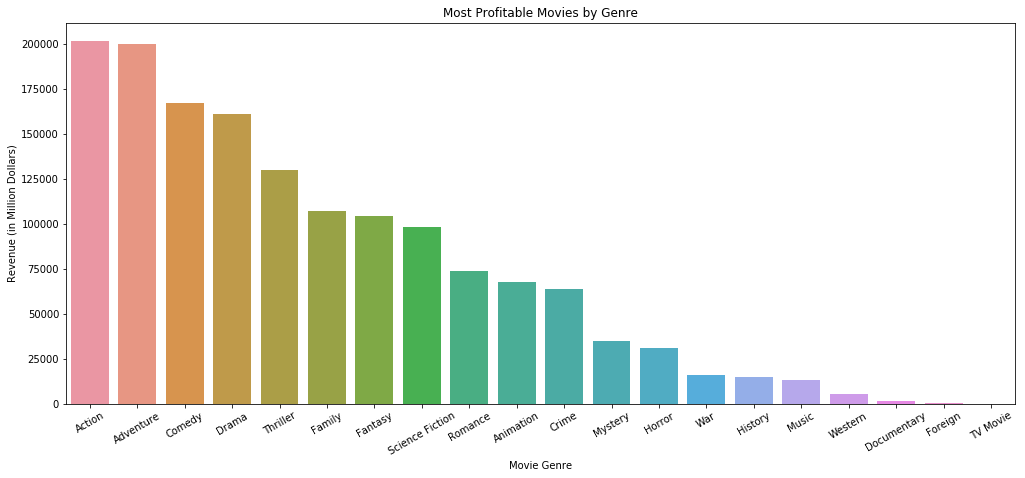

In [6]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x=most_profitable_genre['genre'],y=most_profitable_genre['revenue'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Revenue (in Million Dollars)")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Most Profitable Movies by Genre")

In [7]:
movies.drop(movies.index[35587],inplace=True)
genre_popularity = {}

for i,_ in movies.iterrows():
    for item in movies['genres'][i]:
        if 'name' in item and movies.iloc[i]['popularity'] is not np.nan:
            a = item['name']
            b = float(movies.iloc[i]['popularity'])
            if a in genre_popularity:
                genre_popularity[a]['total_popularity_points'] += b 
                genre_popularity[a]['total_popularity_counts'] += 1
            else:
                genre_popularity[a] = {}
                genre_popularity[a]['genre'] = a
                genre_popularity[a]['total_popularity_points'] = b
                genre_popularity[a]['total_popularity_counts'] = 0

most_popular_genre = pd.DataFrame(None,None,columns=['genre','average_popularity_points'])

for k,v in genre_popularity.items():
    most_popular_genre =  most_popular_genre.append({'genre':v['genre'],'average_popularity_points':v['total_popularity_points']/v['total_popularity_counts']},ignore_index=True)

In [8]:
most_popular_genre = most_popular_genre.sort_values(by='average_popularity_points',ascending=False)

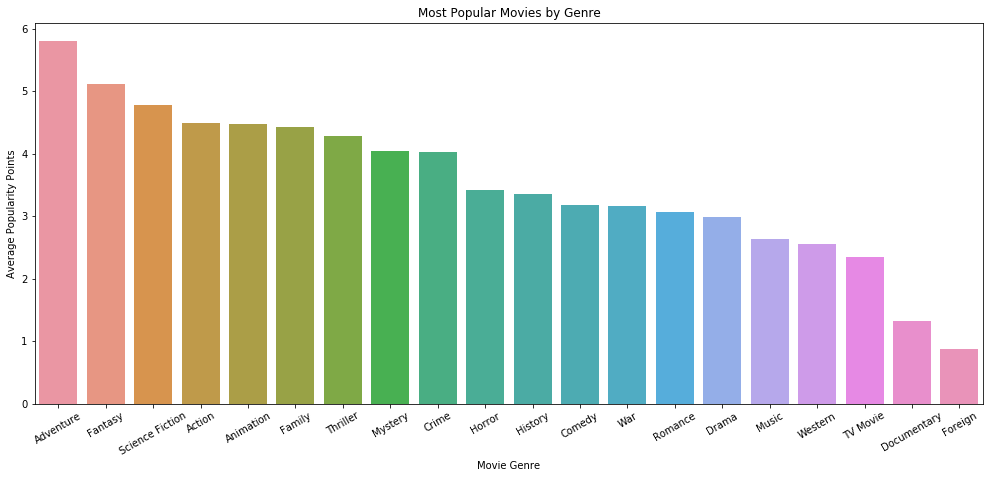

In [9]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x=most_popular_genre['genre'],y=most_popular_genre['average_popularity_points'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Average Popularity Points")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Most Popular Movies by Genre")

In [10]:
genres = []

for i,row in movies.iterrows():
    if row['genres'] is not np.nan:
        a = row['genres']
        for item in a:
            if item['name'] not in genres:
                genres.append(item['name'])
genres

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Science Fiction',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western',
 'TV Movie',
 'Carousel Productions',
 'Vision View Entertainment',
 'Telescene Film Group Productions',
 'Aniplex',
 'GoHands',
 'BROSTA TV',
 'Mardock Scramble Production Committee',
 'Sentai Filmworks']

## Acteurs

Nous avons choisi d'analyser la liste des acteurs. Par question de pertinence nous n'avons pris que les acteurs ayant jouer dans plus de 50 films.

Nous avons mis en place un fichier txt que nous avons par la suite convertis en csv nous même.

In [11]:
credit = pd.read_csv('the-movies-dataset/credits.csv')

In [12]:
"""
cast = credit["cast"]

list_actor = []
list_actor_id = []
list_actor_appearance = []

longueur = len(cast)
for i in range(longueur): #liste de tout les acteurs
    list_cast = ast.literal_eval(cast[i])
    for j in list_cast:
        if j["id"] in list_actor_id:
            index = list_actor_id.index(j["id"])
            list_actor_appearance[index] += 1
        else:
            list_actor.append(j["name"])
            list_actor_id.append(j["id"])
            list_actor_appearance.append(1)

list_actor_final = []

longueur = len(list_actor)
"""

'\ncast = credit["cast"]\n\nlist_actor = []\nlist_actor_id = []\nlist_actor_appearance = []\n\nlongueur = len(cast)\nfor i in range(longueur): #liste de tout les acteurs\n    list_cast = ast.literal_eval(cast[i])\n    for j in list_cast:\n        if j["id"] in list_actor_id:\n            index = list_actor_id.index(j["id"])\n            list_actor_appearance[index] += 1\n        else:\n            list_actor.append(j["name"])\n            list_actor_id.append(j["id"])\n            list_actor_appearance.append(1)\n\nlist_actor_final = []\n\nlongueur = len(list_actor)\n'

In [13]:
"""
fichier = open("list_actor.txt","w")

fichier.write('Acteur,id_Acteur,nb_films\n')

for i in range(longueur-1): #Garder les acteurs de + de x films
    if list_actor_appearance[i] >= 50: #Nombre de films minimum pour être dans la liste
        list_actor_final.append([list_actor[i],list_actor_id[i],list_actor_appearance[i]])
        fichier.write(str(list_actor[i]))
        fichier.write(',')
        fichier.write(str(list_actor_id[i]))
        fichier.write(',')
        fichier.write(str(list_actor_appearance[i]))
        fichier.write('\n')

fichier.close()
"""

'\nfichier = open("list_actor.txt","w")\n\nfichier.write(\'Acteur,id_Acteur,nb_films\n\')\n\nfor i in range(longueur-1): #Garder les acteurs de + de x films\n    if list_actor_appearance[i] >= 50: #Nombre de films minimum pour être dans la liste\n        list_actor_final.append([list_actor[i],list_actor_id[i],list_actor_appearance[i]])\n        fichier.write(str(list_actor[i]))\n        fichier.write(\',\')\n        fichier.write(str(list_actor_id[i]))\n        fichier.write(\',\')\n        fichier.write(str(list_actor_appearance[i]))\n        fichier.write(\'\n\')\n\nfichier.close()\n'

In [14]:
"""
actors = pd.read_csv('./list_actor.txt')
actors.sort_values(by=['nb_films'], ascending=False)
"""

"\nactors = pd.read_csv('./list_actor.txt')\nactors.sort_values(by=['nb_films'], ascending=False)\n"

## Keywords

Nous allons analyser tous les mots-clé de chaque film afin de voir ceux qui reviennent le plus en fonction du genre.

Dans un premier temps nous enlevons toutes les valeurs qui contiennent une liste vide.  
Ensuite nous récupérons les genres. Puis nous créons un dataframe qui contient les mots clé et les genres. 

In [15]:
keywords = pd.read_csv('the-movies-dataset/keywords.csv')

In [16]:
keywords = keywords[keywords.astype(str)['keywords'] != '[]']
# keywords = keywords.set_index('id')
movie_genres = pd.concat([movies['id'],movies['genres']], axis = 1)
movie_genres = movie_genres[movie_genres.astype(str)['genres'] != "[]"]
movie_genres = movie_genres.set_index('id')

In [17]:
keywords.index = keywords.index.map(str)
movie_genres.index = movie_genres.index.map(str)
df_keywords_genre = pd.merge(keywords, movie_genres, left_index=True, right_index=True)

In [18]:
df_keywords_genre.index = df_keywords_genre.index.map(int)
df_keywords_genre.sort_index()

,id,keywords,genres
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name..."
5,949,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name..."
6,11860,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
11,12110,"[{'id': 3633, 'name': 'dracula'}, {'id': 11931...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
12,21032,"[{'id': 1994, 'name': 'wolf'}, {'id': 6411, 'n...","[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
13,10858,"[{'id': 840, 'name': 'usa president'}, {'id': ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
14,1408,"[{'id': 911, 'name': 'exotic island'}, {'id': ...","[{'id': 18, 'name': 'Drama'}]"
15,524,"[{'id': 383, 'name': 'poker'}, {'id': 726, 'na...","[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '..."
16,4584,"[{'id': 420, 'name': 'bowling'}, {'id': 818, '...","[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."


A l'aide de la liste de genres que nous avons trouvé avant nous récupérons les genres et les mots clés du dataset
movie_metadata et comptons :  
* l'occurence du mot clé dans toute le dataset
* l'occurence du mot clé par genre

In [19]:
genres = ['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']

list_keywords = []
list_appearance_genres = []
list_appearance = []

liste_nb_films = []
liste_nb_mots = []

liste_max = [0 for zero in range(20)]
liste_mot_max = ['' for zero in range(20)]

for i in range(len(df_keywords_genre)):#parcourir le dataframe -> len(df_keywords_genre)
    
    list_genres = [0 for zero in range(20)]
    
    line_genres = df_keywords_genre.iloc[i]['genres'] #convert la ligne en dict
    long_line_genres = len(line_genres)
    
    for j in range(20):#parcourir les genres
        
        for k in range(long_line_genres):#voir s'ils correspondent au film
            
            if str(line_genres[k]['name']) == genres[j]:#si oui, on passe à 1
                list_genres[j] = 1
    
    line_keywords = ast.literal_eval(df_keywords_genre.iloc[i]['keywords'])#convert la ligne en dict
    long_line_keywords = len(line_keywords)
    
    for j in range(long_line_keywords):#parcourir les keywords

        if str(line_keywords[j]['name']) in list_keywords:#voir s'il est déjà dans la lise des keywords
            ind = list_keywords.index(line_keywords[j]['name'])
            list_appearance[ind] += 1#incrementer son nombre d'appartion total
            
            for k in range(20):#incrementer son nombre d'apparition par genre
                list_appearance_genres[ind][k] += list_genres[k]
                
                if liste_max[k]<list_appearance_genres[ind][k]:#Mot le plus vu dans chaque genre
                    liste_max[k] = list_appearance_genres[ind][k]
                    liste_mot_max[k] = line_keywords[j]['name']
            
        else:
            list_keywords.append(str(line_keywords[j]['name']))
            list_appearance_genres.append(list(list_genres))
            list_appearance.append(1)    

In [20]:
df_keywords_appearance = pd.DataFrame(list(zip(list_keywords, list_appearance_genres, list_appearance)), columns =['Keyword', 'AppearancePerGenre', 'AppearanceTotal'])
df_keywords_appearance.sort_values(by=['AppearanceTotal'],ascending=False, inplace=True)
df_keywords_appearance = df_keywords_appearance[df_keywords_appearance['AppearanceTotal'] > 1]
df_keywords_appearance

,Keyword,AppearancePerGenre,AppearanceTotal
293,woman director,"[58, 443, 109, 120, 82, 236, 636, 248, 172, 28...",1279
17,independent film,"[44, 298, 67, 113, 60, 144, 436, 179, 106, 196...",853
51,murder,"[27, 197, 43, 77, 43, 97, 241, 116, 73, 117, 7...",539
422,based on novel,"[11, 115, 20, 36, 24, 61, 184, 61, 43, 78, 40,...",353
443,musical,"[12, 119, 23, 32, 20, 60, 151, 48, 39, 67, 42,...",319
76,sex,"[10, 118, 21, 30, 25, 49, 143, 57, 43, 81, 63,...",315
221,violence,"[13, 103, 24, 30, 31, 43, 119, 61, 29, 62, 40,...",277
470,nudity,"[13, 96, 25, 28, 22, 49, 148, 48, 28, 62, 41, ...",277
220,revenge,"[14, 87, 19, 45, 21, 47, 143, 64, 41, 55, 27, ...",271
52,suspense,"[11, 102, 25, 33, 22, 51, 132, 54, 46, 62, 27,...",263


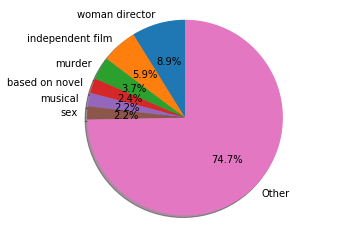

In [21]:
df_keywords_appearance_head = df_keywords_appearance.head(100)
sum_mots = df_keywords_appearance_head['AppearanceTotal'].sum()

#pour les 100 mots les plus utilisés on regarde la proportion

list_occur_mots = []
liste_mots = []

for i in range(6):
    list_occur_mots.append(df_keywords_appearance_head.iloc[i]['AppearanceTotal'])
    sum_mots -= df_keywords_appearance_head.iloc[i]['AppearanceTotal']
    liste_mots.append(df_keywords_appearance_head.iloc[i]['Keyword'])

list_occur_mots.append(sum_mots)
liste_mots.append('Other')

labels = liste_mots
sizes = list_occur_mots

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [22]:
matrix_max_per_genre = [[0 for zero in range(10)] for i in range(20)]#les 10 mots les plus utilisés par genre
matrix_keywords = [['' for zero in range(10)] for i in range(20)]

for i in range(10):
    
    for j in range(100):#on parcourt le df de 100 lignes
        
        for k in range(20):#on parcourt par genre
            
            if df_keywords_appearance_head.iloc[j]['AppearancePerGenre'][k] > matrix_max_per_genre[k][i]:#on teste si c'est le max
                
                    if not df_keywords_appearance_head.iloc[j]['Keyword'] in matrix_keywords[k]:#on teste s'il est déjà dans la liste
                    
                        matrix_max_per_genre[k][i] = df_keywords_appearance_head.iloc[j]['AppearancePerGenre'][k]
                        matrix_keywords[k][i] = df_keywords_appearance_head.iloc[j]['Keyword']

In [33]:
for i in range(20):
    print(genres[i])
    print(pd.DataFrame(list(zip(matrix_keywords[i], matrix_max_per_genre[i])), columns=['Keyword','Nombre']))
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

Animation
                Keyword  Nombre
0        woman director      58
1      independent film      44
2                murder      27
3               revenge      14
4              teenager      14
5              violence      13
6                nudity      13
7                 sport      13
8  duringcreditsstinger      13
9               musical      12
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Comedy
            Keyword  Nombre
0    woman director     443
1  independent film     298
2            murder     197
3           musical     119
4               sex     118
5    based on novel     115
6          violence     103
7          suspense     102
8            nudity      96
9              love      92
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Family
            Keyword  Nombre
0    woman director     109
1  independent film      67
2            murder      43
3            nudity      25
4          suspense      25
5          violence      24
6           musical      23
7               sex      21


In [24]:
df_occur_mots_par_genres = pd.DataFrame(list(zip(genres, liste_mot_max, liste_max)), columns =['Genre','Keyword','Nombre'])
df_occur_mots_par_genres.sort_values(by=['Nombre'],ascending=False, inplace=True)

## Films par an et par pays

Nous gardons les colonnes qui nous intéresse pour l'analyse des films par an. Nous supprimons les lignes superflues (notamment deux lignes qui ont pour release date 1, 12 and 22)

In [25]:
movies = pd.read_csv('the-movies-dataset/movies_metadata.csv')

/Users/romane/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
movies.drop(columns=['adult','belongs_to_collection','genres','homepage','id','imdb_id','original_language','original_title','overview','spoken_languages','status','tagline','video','vote_average','vote_count','popularity','poster_path','production_companies'], inplace=True)
movies.drop(columns=['budget','runtime','revenue'], inplace=True)
movies.sort_values(by='release_date', inplace=True)
movies = movies[movies.astype(str)['release_date'] != '1']
movies = movies[movies.astype(str)['release_date'] != '12']
movies = movies[movies.astype(str)['release_date'] != '22']
movies.dropna(subset=['release_date'],inplace=True)

In [27]:
liste_pays = []

for i in range(len(movies)):
    if ast.literal_eval(movies.iloc[i]['production_countries']) != []:
        liste_pays.append(ast.literal_eval(movies.iloc[i]['production_countries'])[0]['name']) #convert la ligne en dict
    else:
        liste_pays.append('Unknown')

movies['pays'] = liste_pays
movies.drop(columns=['production_countries'], inplace=True)


movies

,release_date,title,pays
34940,1874-12-09,Passage of Venus,France
34937,1878-06-14,Sallie Gardner at a Gallop,United States of America
41602,1883-11-19,Buffalo Running,United States of America
34933,1887-08-18,Man Walking Around a Corner,United States of America
34934,1888-01-01,Accordion Player,United Kingdom
34938,1888-10-15,Traffic Crossing Leeds Bridge,United Kingdom
34939,1890-01-01,London's Trafalgar Square,United Kingdom
41194,1890-03-09,Mosquinha,Unknown
34936,1890-11-21,"Monkeyshines, No. 2",United States of America
39954,1890-11-21,"Monkeyshines, No. 3",United States of America


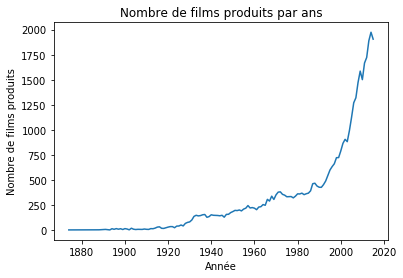

In [28]:
df_dates = movies['release_date'].groupby([pd.to_datetime(movies['release_date']).dt.year]).agg({'count'})
# La base de données n'étant pas mis à jour nous enlevons les films de 2016 à 2020.
df_dates = df_dates[df_dates.index != 2016]
df_dates = df_dates[df_dates.index != 2017]
df_dates = df_dates[df_dates.index != 2018]
df_dates = df_dates[df_dates.index != 2019]
df_dates = df_dates[df_dates.index != 2020]
plt.plot(df_dates.index, df_dates['count'])
plt.xlabel('Année')
plt.ylabel('Nombre de films produits')
plt.title('Nombre de films produits par ans')
plt.show()